<a href="https://colab.research.google.com/github/elainepereiras/desafio5dnc/blob/main/Desafio_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Desafio: Prepare seu dataset para modelagem de dados

In [ ]:
!pip install sidetable
!install pandas-profiling --upgrade
!pip install numba==0.53.1
!pip install ydata-profiling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.4/45.4 kB 1.7 MB/s eta 0:00:00
install: unrecognized option '--upgrade'
Try 'install --help' for more information.
ERROR: Ignored the following versions that require a different python version: 0.52.0 Requires-Python >=3.6,<3.9; 0.52.0rc3 Requires-Python >=3.6,<3.9; 0.53.0 Requires-Python >=3.6,<3.10; 0.53.0rc1.post1 Requires-Python >=3.6,<3.10; 0.53.0rc2 Requires-Python >=3.6,<3.10; 0.53.0rc3 Requires-Python >=3.6,<3.10; 0.53.1 Requires-Python >=3.6,<3.10; 0.54.0 Requires-Python >=3.7,<3.10; 0.54.0rc2 Requires-Python >=3.7,<3.10; 0.54.0rc3 Requires-Python >=3.7,<3.10; 0.54.1 Requires-Python >=3.7,<3.10
ERROR: Could not find a version that satisfies the requirement numba==0.53.1 (from versions: 0.1, 0.2, 0.3, 0.5.0, 0.6.0, 0.7.0, 0.7.1, 0.7.2, 0.8.0, 0.8.1, 0.9.0, 0.10.0, 0.10.1, 0.11.0, 0.12.0, 0.12.1, 0.12.2, 0.13.0, 0.13.2, 0.13.3, 0.13.4, 0.14.0, 0.15.1, 0.16.0, 0.17.0, 0.18.1, 0.18.2, 0.19.1, 0.19.2, 0.20.0, 0.21.0, 0.22.0, 0.22.1, 

In [ ]:
# Importando as bibliotecas
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt


import missingno as msno
from ipywidgets import interact, widgets

from sklearn import datasets
from sklearn.preprocessing import scale, minmax_scale, power_transform

from sklearn.preprocessing import scale

1 - Leia o arquivo e inspecione os dados.
Ler o dataset, utilizar describe

In [ ]:
# lendo arquivo e verificando as 5 primeiras linhas
dt = pd.read_csv('/content/Data - data.csv.csv')
dt.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 08:26,3.39,17850.0,United Kingdom


In [ ]:
# Verificando a distribuição dos dados
dt.describe()


,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611121,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


2 - Verifique se há valores faltantes na identificação do cliente.
Remova estas observações.

In [ ]:
# Identificar e mostrar valores nulos
dt_missing = (
  dt.isna().sum()
  .to_frame('missing_count')
  .join((dt.isna().sum() / dt.shape[0]).to_frame('missing_pct'))
  .sort_values('missing_count', ascending=False)
)

dt_missing.style.format('{:.2%}', subset=['missing_pct'])

,missing_count,missing_pct
CustomerID,135080,24.93%
Description,1454,0.27%
InvoiceNo,0,0.00%
StockCode,0,0.00%
Quantity,0,0.00%
InvoiceDate,0,0.00%
UnitPrice,0,0.00%
Country,0,0.00%


Método com sintaxe em cadeia:

In [ ]:
dt.isna().sum().to_frame('missing_count').assign(missing_pct = lambda x: x.div(len(dt))).sort_values('missing_count', ascending=False)

,missing_count,missing_pct
CustomerID,135080,0.249267
Description,1454,0.002683
InvoiceNo,0,0.000000
StockCode,0,0.000000
Quantity,0,0.000000
InvoiceDate,0,0.000000
UnitPrice,0,0.000000
Country,0,0.000000


Mostrando as linhas com valores faltantes na coluna 'CustomerID':

In [ ]:
dt[dt.CustomerID.isna()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,12/1/2010 11:52,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,12/1/2010 14:32,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,12/1/2010 14:32,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,12/1/2010 14:32,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,12/1/2010 14:32,1.66,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
541536,581498,85099B,JUMBO BAG RED RETROSPOT,5,12/9/2011 10:26,4.13,NaN,United Kingdom
541537,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,12/9/2011 10:26,4.13,NaN,United Kingdom
541538,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,12/9/2011 10:26,4.96,NaN,United Kingdom
541539,581498,85174,S/4 CACTI CANDLES,1,12/9/2011 10:26,10.79,NaN,United Kingdom


In [ ]:
# Removendo nulos
dt.dropna(axis=0, subset='CustomerID', inplace=True)

In [ ]:
dt.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 08:26,3.39,17850.0,United Kingdom


3 - Verifique se há produtos com preços unitários iguais ou inferior a 0.
Remova estas observações.

In [ ]:
dt[dt['UnitPrice'] <= 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
9302,537197,22841,ROUND CAKE TIN VINTAGE GREEN,1,12/5/2010 14:02,0.0,12647.0,Germany
33576,539263,22580,ADVENT CALENDAR GINGHAM SACK,4,12/16/2010 14:36,0.0,16560.0,United Kingdom
40089,539722,22423,REGENCY CAKESTAND 3 TIER,10,12/21/2010 13:45,0.0,14911.0,EIRE
47068,540372,22090,PAPER BUNTING RETROSPOT,24,1/6/2011 16:41,0.0,13081.0,United Kingdom
47070,540372,22553,PLASTERS IN TIN SKULLS,24,1/6/2011 16:41,0.0,13081.0,United Kingdom
56674,541109,22168,ORGANISER WOOD ANTIQUE WHITE,1,1/13/2011 15:10,0.0,15107.0,United Kingdom
86789,543599,84535B,FAIRY CAKES NOTEBOOK A6 SIZE,16,2/10/2011 13:08,0.0,17560.0,United Kingdom
130188,547417,22062,CERAMIC BOWL WITH LOVE HEART DESIGN,36,3/23/2011 10:25,0.0,13239.0,United Kingdom
139453,548318,22055,MINI CAKE STAND HANGING STRAWBERY,5,3/30/2011 12:45,0.0,13113.0,United Kingdom
145208,548871,22162,HEART GARLAND RUSTIC PADDED,2,4/4/2011 14:42,0.0,14410.0,United Kingdom


In [ ]:
#removendo preço menor ou igual a zero
dt_clean = dt[dt['UnitPrice'] > 0]

4 - Verifique se há produtos com quantidade igual ou inferior a 0.
Remova estas observações.

In [ ]:
dt[dt['Quantity'] <= 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,12/1/2010 09:41,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/1/2010 09:49,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12/1/2010 10:24,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,12/9/2011 09:57,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,12/9/2011 10:28,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,12/9/2011 11:57,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,12/9/2011 11:58,1.25,17315.0,United Kingdom


In [ ]:
#removendo quantidade menor ou igual a zero
dt_clean = dt[dt['Quantity'] > 0]

In [ ]:
dt.describe()

,Quantity,UnitPrice,CustomerID
count,406829.000000,406829.000000,406829.000000
mean,12.061303,3.460481,15287.690570
std,248.693370,69.315161,1713.600303
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13953.000000
50%,5.000000,1.950000,15152.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,38970.000000,18287.000000


5 - Verifique se existem linhas duplicadas. Remova estas observações (pois não faz sentido uma mesma compra para o mesmo cliente no mesmo horário, com mesmos valores etc.)

In [ ]:
# Identificar valores duplicados
dt.duplicated(keep=False).sum()

10062

In [ ]:
# Identificar valores duplicados
dt[dt.duplicated(keep=False)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
485,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,12/1/2010 11:45,4.95,17908.0,United Kingdom
489,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,12/1/2010 11:45,2.10,17908.0,United Kingdom
494,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,12/1/2010 11:45,1.25,17908.0,United Kingdom
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,12/1/2010 11:45,1.25,17908.0,United Kingdom
521,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,12/1/2010 11:45,2.95,17908.0,United Kingdom
...,...,...,...,...,...,...,...,...
541675,581538,22068,BLACK PIRATE TREASURE CHEST,1,12/9/2011 11:34,0.39,14446.0,United Kingdom
541689,581538,23318,BOX OF 6 MINI VINTAGE CRACKERS,1,12/9/2011 11:34,2.49,14446.0,United Kingdom
541692,581538,22992,REVOLVER WOODEN RULER,1,12/9/2011 11:34,1.95,14446.0,United Kingdom
541699,581538,22694,WICKER STAR,1,12/9/2011 11:34,2.10,14446.0,United Kingdom


In [ ]:
# Identificar quantos valores duplicados há em cada duplicata
(
  dt
 .groupby(dt.columns.tolist(), dropna=False)
 .size()
 .to_frame('n_duplicates')
 .query('n_duplicates>1')
 .sort_values('n_duplicates', ascending=False)
 .head(5)
)

n_duplicates
InvoiceNo StockCode Description                         Quantity InvoiceDate      UnitPrice CustomerID Country                     
555524    22698     PINK REGENCY TEACUP AND SAUCER      1        6/5/2011 11:37   2.95      16923.0    United Kingdom            20
          22697     GREEN REGENCY TEACUP AND SAUCER     1        6/5/2011 11:37   2.95      16923.0    United Kingdom            12
572861    22775     PURPLE DRAWERKNOB ACRYLIC EDWARDIAN 12       10/26/2011 12:46 1.25      14102.0    United Kingdom             8
572344    M         Manual                              48       10/24/2011 10:43 1.50      14607.0    United Kingdom             6
540524    21756     BATH BUILDING BLOCK WORD            1        1/9/2011 12:53   5.95      16735.0    United Kingdom             6

In [ ]:
# Remover valores duplicados
dt.drop_duplicates()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 08:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [ ]:
dt.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 08:26,3.39,17850.0,United Kingdom


In [ ]:
dt.describe()

,Quantity,UnitPrice,CustomerID
count,406829.000000,406829.000000,406829.000000
mean,12.061303,3.460481,15287.690570
std,248.693370,69.315161,1713.600303
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13953.000000
50%,5.000000,1.950000,15152.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,38970.000000,18287.000000


6 - Tipos de dados da coluna.
1. Corrija o tipo de dado do CustomerID
2. Corrija o tipo de dado da InvoiceDate

In [ ]:
# verificando as informações
dt.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    406829 non-null  object 
 1   StockCode    406829 non-null  object 
 2   Description  406829 non-null  object 
 3   Quantity     406829 non-null  int64  
 4   InvoiceDate  406829 non-null  object 
 5   UnitPrice    406829 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      406829 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.9+ MB


In [ ]:
#Corrigindo o tipo de dados
dt = dt.astype({'InvoiceDate': 'datetime64[ns]', 'CustomerID': 'int64'})
dt.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


In [ ]:
#Verificando os dados alterados
dt.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  int64         
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 27.9+ MB


7 - Tratando os outliers.
Considerou a quantidade acima 10000 e o
preço acima 5000 como outlier

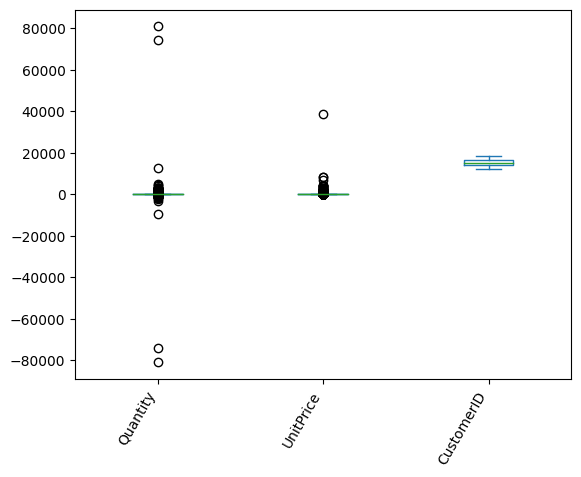

In [ ]:
# Box plot com dados "as is"
dt.plot.box()
plt.xticks(rotation=60, ha='right');

In [ ]:
# Considerando informações abaixo de 10000 e 5000
dt[(dt['Quantity'] <= 10000) & (dt['UnitPrice'] <= 5000)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France


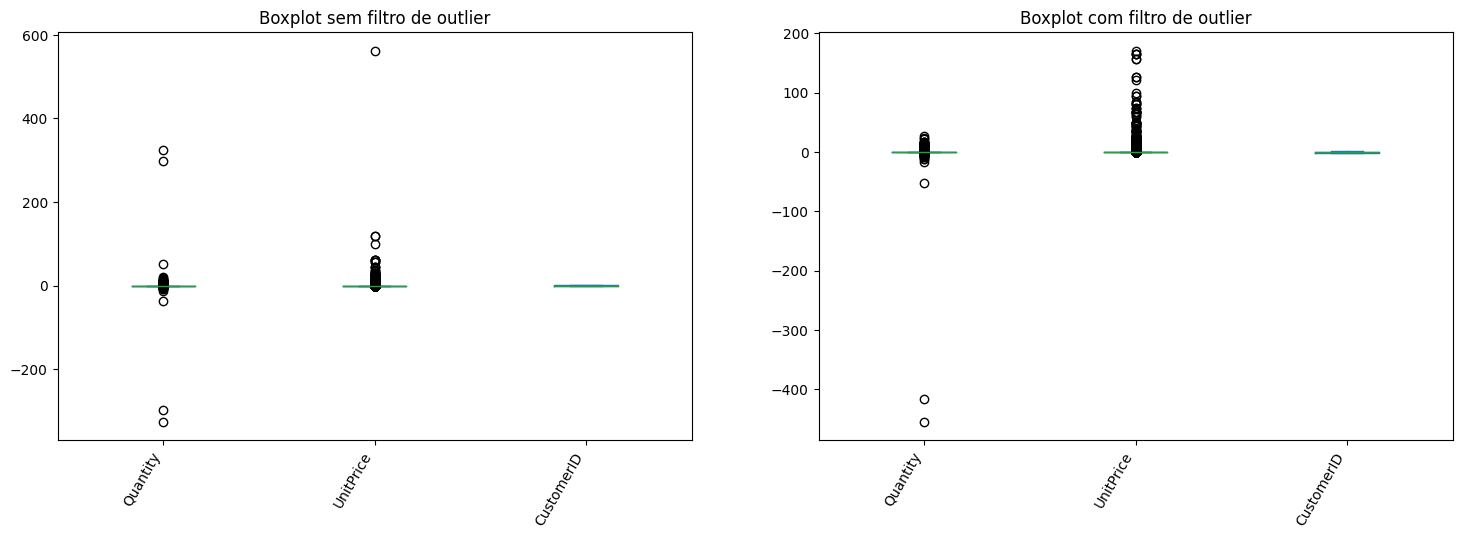

In [ ]:
# Filtro para remover outliers
dt_without_outliers = dt[(dt['Quantity'] <= 10000) & (dt['UnitPrice'] <= 5000)]

# Filtrar colunas numéricas
colunas_numericas = dt.select_dtypes(include=['float64', 'int64']).columns

# Criando os gráficos
fig, axes = plt.subplots(ncols=2, figsize=(18, 6))

# Boxplot sem o filtro de outliers, apenas com colunas numéricas
dt[colunas_numericas].apply(scale).plot.box(ax=axes[0], title='Boxplot sem filtro de outlier')

# Boxplot com o filtro de outliers, apenas com colunas numéricas
dt_without_outliers[colunas_numericas].apply(scale).plot.box(ax=axes[1], title='Boxplot com filtro de outlier')

# Ajustar a formatação do gráfico
fig.autofmt_xdate(rotation=60, ha='right')

# Exibir o gráfico
plt.show()


In [ ]:
# Mostrando percentis
dt.describe(percentiles=[.01, .25, .5, .75, .9, .99])

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,406829.000000,406829,406829.000000,406829.000000
mean,12.061303,2011-07-10 16:30:57.879207424,3.460481,15287.690570
min,-80995.000000,2010-12-01 08:26:00,0.000000,12346.000000
1%,-2.000000,2010-12-03 10:26:00,0.210000,12415.000000
25%,2.000000,2011-04-06 15:02:00,1.250000,13953.000000
50%,5.000000,2011-07-31 11:48:00,1.950000,15152.000000
75%,12.000000,2011-10-20 13:06:00,3.750000,16791.000000
90%,24.000000,2011-11-20 16:07:00,6.750000,17719.000000
99%,120.000000,2011-12-07 14:01:00,15.000000,18212.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000


8 - Crie uma coluna adicional. Utilizou as colunas Quantity e UnitPrice

In [ ]:
#Criando coluna
dt['Total'] = dt['Quantity'] * dt['UnitPrice']
dt.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


9 - Última data.
Utilizou a função max() para achar a ultima
data

In [ ]:
lastdate = dt['InvoiceDate'].max()
lastdate

Timestamp('2011-12-09 12:50:00')

10 - Plotando gráficos.
- Top 10 países com maior valor em
vendas
- Top 10 produtos mais vendidos
- Valor de venda total por mês
- Valor de venda total por mês e por país
(considere apenas os top 10)

In [ ]:
#Top10 paises com maior valor em vendas
agg_count = dt.groupby(['Country'])['Total'].agg('sum').reset_index().sort_values('Total', ascending=False)
agg_count.reset_index(inplace=True)
agg_count.drop('index', axis=1, inplace=True)
agg_count.head(10)

,Country,Total
0,United Kingdom,6767877.39
1,Netherlands,284661.54
2,EIRE,250285.22
3,Germany,221698.21
4,France,196712.84
5,Australia,137077.27
6,Switzerland,55739.40
7,Spain,54774.58
8,Belgium,40910.96
9,Sweden,36595.91


In [ ]:
top_count = agg_count.loc[agg_count.index <= 9]

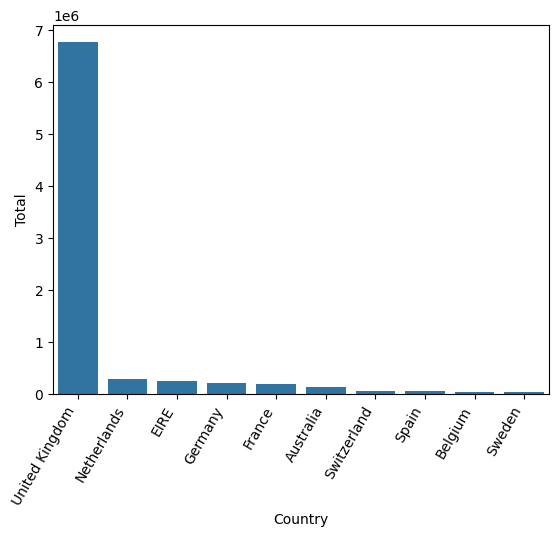

In [ ]:
sns.barplot(data=top_count, x='Country', y='Total')
plt.xticks(rotation=60, ha='right');

In [ ]:
#Top10 produtos mais vendidos
agg_prod = dt.groupby(['StockCode'])['Quantity'].agg('sum').reset_index().sort_values('Quantity', ascending=False)
agg_prod.reset_index(inplace=True)
agg_prod.drop('index', axis=1, inplace=True)
agg_prod.head(10)

,StockCode,Quantity
0,84077,53215
1,22197,48712
2,85099B,45066
3,84879,35314
4,85123A,34204
5,21212,33409
6,23084,27094
7,22492,25880
8,22616,25321
9,21977,24163


In [ ]:
top_prod = agg_prod.loc[agg_prod.index <= 9]

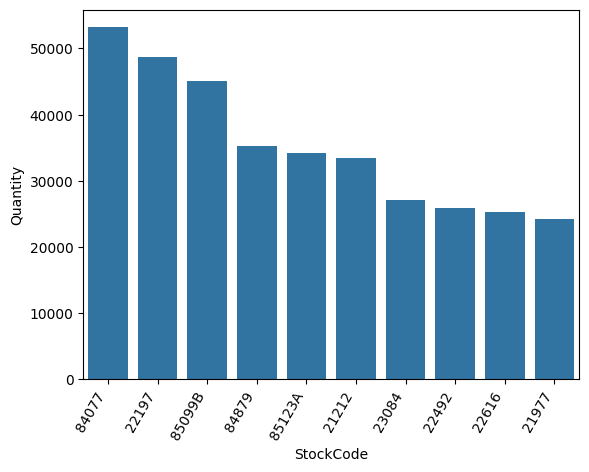

In [ ]:
sns.barplot(data=top_prod, x='StockCode', y='Quantity')
plt.xticks(rotation=60, ha='right');

In [ ]:
#Valor de venda total por mês
dt_alt = dt.set_index('InvoiceDate').sort_index()
agg_date = dt_alt[['Quantity', 'Total']].resample('M').sum()
agg_date

<ipython-input-114-b811bef92f8a>:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  agg_date = dt_alt[['Quantity', 'Total']].resample('M').sum()


,Quantity,Total
InvoiceDate,,
2010-12-31,296362,554604.02
2011-01-31,269379,475074.38
2011-02-28,262833,436546.15
2011-03-31,344012,579964.61
2011-04-30,278585,426048.85
2011-05-31,367852,648251.08
2011-06-30,356922,608013.16
2011-07-31,363418,574239.48
2011-08-31,386612,616368.00


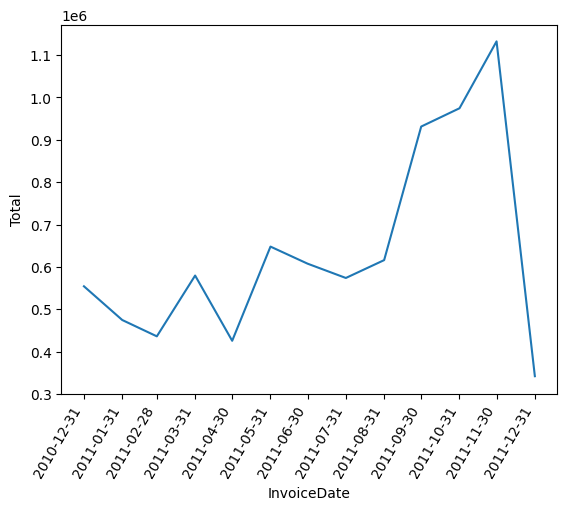

In [ ]:
sns.lineplot(data=agg_date, x=agg_date.index, y='Total')
plt.xticks(agg_date.index, rotation=60, ha='right')
plt.yticks(np.arange(300000, 1200000, step=100000));

In [ ]:

dt_alt['Period'] = dt_alt.index.strftime('%m/%Y')
dt_alt = dt_alt[dt_alt['Country'].isin(top_count['Country'])]
dt_alt

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Total,Period
InvoiceDate,,,,,,,,,
2010-12-01 08:26:00,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850,United Kingdom,15.30,12/2010
2010-12-01 08:26:00,536365,71053,WHITE METAL LANTERN,6,3.39,17850,United Kingdom,20.34,12/2010
2010-12-01 08:26:00,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850,United Kingdom,22.00,12/2010
2010-12-01 08:26:00,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850,United Kingdom,20.34,12/2010
2010-12-01 08:26:00,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850,United Kingdom,20.34,12/2010
...,...,...,...,...,...,...,...,...,...
2011-12-09 12:50:00,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,0.85,12680,France,10.20,12/2011
2011-12-09 12:50:00,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2.10,12680,France,12.60,12/2011
2011-12-09 12:50:00,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,4.15,12680,France,16.60,12/2011


In [ ]:
#Valor de venda total por mês e por país
agg_mt = dt_alt.groupby(['Country', 'Period'])['Total'].agg('sum')
agg_mt = agg_mt.reset_index()
agg_mt['Period'] = pd.to_datetime(agg_mt['Period'], format='%m/%Y')
agg_mt = agg_mt.sort_values('Period')
agg_mt

,Country,Period,Total
88,Spain,2010-12-01,1843.73
75,Netherlands,2010-12-01,8784.48
23,Belgium,2010-12-01,1809.91
49,France,2010-12-01,9575.36
36,EIRE,2010-12-01,7825.57
...,...,...,...
50,France,2011-12-01,7048.83
37,EIRE,2011-12-01,6976.37
24,Belgium,2011-12-01,1409.43
102,Sweden,2011-12-01,0.00


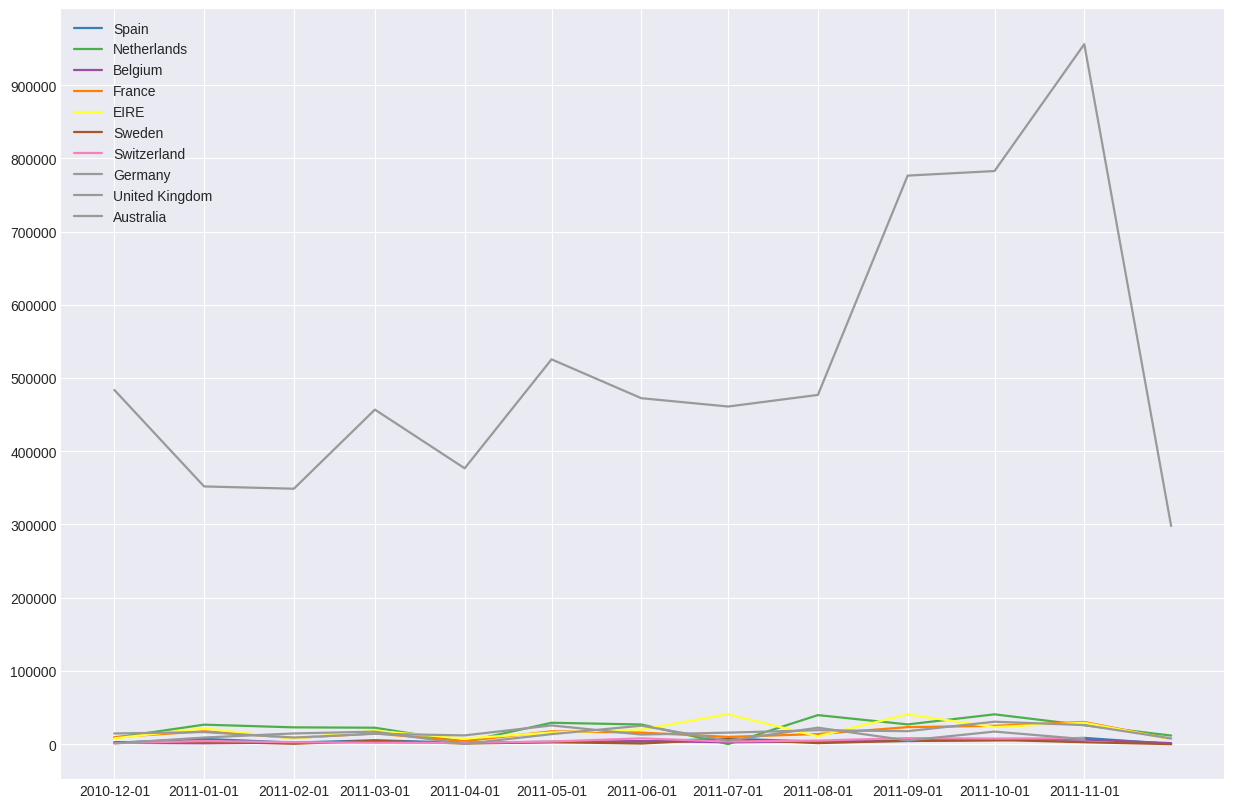

In [ ]:
#Valor de venda total por mês e por país
plt.figure(figsize=(15,10))
plt.style.use('seaborn-v0_8-darkgrid')
palette = plt.get_cmap('Set1')
n = 0
for value in agg_mt['Country'].unique():
  n += 1
  country = agg_mt.loc[agg_mt['Country'] == value]
  plt.plot(country['Period'], country['Total'], marker='', color=palette(n), linewidth=1.6, alpha=1, label=value)
  plt.xticks(ticks=country['Period'])
  plt.yticks(ticks=np.arange(0, 1000000, step=100000))
  plt.legend();

11 - Cálculo do RFM.
Agrupe os dados por cliente e
pedido/compra (InvoiceNo) e obtenha a
data e o preço total do pedido.
Com isso, agrupe novamente apenas por
cliente e calcule o RFM, onde:
- R
é a recência, diferença em dias da última
compra do cliente e da última compra
disponível no conjunto de dados, que
calcularam previamente.
- F é a frequência, ou seja, a quantidade
de compras feitas pelo cliente;
- M é o ticket médio, ou seja, a média das
compras feitas pelo cliente.

In [ ]:
#Agrupando dados de quantidade e valor vendido por Cliente, Compra e Data
rfm = dt.groupby(['CustomerID', 'InvoiceNo', 'InvoiceDate'])[['Quantity', 'Total']].agg('sum').reset_index()
rfm = rfm.sort_values('CustomerID')
rfm

,CustomerID,InvoiceNo,InvoiceDate,Quantity,Total
0,12346,541431,2011-01-18 10:01:00,74215,77183.60
1,12346,C541433,2011-01-18 10:17:00,-74215,-77183.60
2,12347,537626,2010-12-07 14:57:00,319,711.79
3,12347,542237,2011-01-26 14:30:00,315,475.39
4,12347,549222,2011-04-07 10:43:00,483,636.25
...,...,...,...,...,...
22208,18283,557956,2011-06-23 19:20:00,157,203.81
22217,18283,580872,2011-12-06 12:02:00,142,208.00
22219,18287,570715,2011-10-12 10:23:00,990,1001.32
22218,18287,554065,2011-05-22 10:39:00,488,765.28


In [ ]:
#Recência de cada cliente
r_only = []

for v in rfm['CustomerID'].unique():
    customer = rfm.loc[rfm['CustomerID'] == v]
    values = {'CustomerID': v, 'LastPurchase': customer['InvoiceDate'].max()}
    r_only.append(values)

r_only = pd.DataFrame(r_only)
r_only['Recency'] = (lastdate - r_only['LastPurchase']).dt.days
r_only.drop('LastPurchase', axis=1, inplace=True)
r_only

,CustomerID,Recency
0,12346,325
1,12347,1
2,12348,74
3,12349,18
4,12350,309
...,...,...
4367,18280,277
4368,18281,180
4369,18282,7
4370,18283,3


In [ ]:
#Frequência de cada Cliente
f_only = []

for v in rfm['CustomerID'].unique():
    customer = rfm.loc[rfm['CustomerID'] == v]
    values = {'CustomerID': v, 'Frequency': customer['InvoiceNo'].count()}
    f_only.append(values)

f_only = pd.DataFrame(f_only)
f_only

,CustomerID,Frequency
0,12346,2
1,12347,7
2,12348,4
3,12349,1
4,12350,1
...,...,...
4367,18280,1
4368,18281,1
4369,18282,3
4370,18283,16


In [ ]:
#Valor médio gasto por cliente
m_only = []

for v in rfm['CustomerID'].unique():
    customer = rfm.loc[rfm['CustomerID'] == v]
    values = {'CustomerID': v, 'Monetary': customer['Total'].mean()}
    m_only.append(values)

m_only = pd.DataFrame(m_only)
m_only

,CustomerID,Monetary
0,12346,0.000000
1,12347,615.714286
2,12348,449.310000
3,12349,1757.550000
4,12350,334.400000
...,...,...
4367,18280,180.600000
4368,18281,80.820000
4369,18282,58.866667
4370,18283,130.930000


In [ ]:
#RFM completo
final_rfm = r_only.merge(f_only, left_on='CustomerID', right_on='CustomerID')
final_rfm = final_rfm.merge(m_only, left_on='CustomerID', right_on='CustomerID')
final_rfm.head(10).style.format('{:.2f}', subset='Monetary')

,CustomerID,Recency,Frequency,Monetary
0,12346,325,2,0.00
1,12347,1,7,615.71
2,12348,74,4,449.31
3,12349,18,1,1757.55
4,12350,309,1,334.40
5,12352,35,11,140.49
6,12353,203,1,89.00
7,12354,231,1,1079.40
8,12355,213,1,459.40
9,12356,22,3,937.14
